In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from gait_analysis import *
import os
from scipy.stats import sem

In [2]:
# load data from experiments ... input is the path to a directory that has gait data
# each experiment should be in a separate folder
# each treatment within an experiment should be in a separate folder
tardi_gait = '/Users/iwoods/ic_onedrive/tardi_gait'
os.chdir(tardi_gait)
for d in listDirectories():
    print(d)

2021_3iy_Fall
2021_caffeine_Fall
2021_ldopa_Fall
3iy_July2022
alcohol_43mM_June2022
analyzed_movies
caffeine_20µM_June2022
comps
micrometer_vids
nicotine_100µM_July2022
noTreatment_noTreatment_July2022
old_code
species_comps_2021
wildT_july2022


In [3]:
exp = 'caffeine_20µM_June2022'
exp_dir = os.path.join(tardi_gait, exp)
os.chdir(exp_dir)

# Get a list of available experiments in this directory
print('looking in ' + exp_dir )

for d in listDirectories():
    print(d)

looking in /Users/iwoods/ic_onedrive/tardi_gait/caffeine_20µM_June2022
caffeine_20µM
control


In [4]:
# choose which folders to compare
groupA = 'control'
groupB = 'caffeine_20µM'
fname = 'all_step_data_swings.csv' # created by the script save_step_data.py

In [5]:
# treatment 1: select experiment(s) to analyze
# look for all_step_data_swings.csv in one or more folders, and combine data
df1 = experimentToDf(groupA,fname)
print('DF size',df1.shape)

# look for mov_data.txt in one or more folders, and parse to get size and speed for these clips
clips1 = np.unique(df1['clip'])
size_speed_1 = sizeAndSpeed(groupA, clips1)

df1[df1.ref_leg=='R3'].head(3)


Choose from this list (separate by commas if multiple choices): 
1: 1a002-008
2: 1a021-030
3: 1b003-007
4: 1b010-019
5: 1b029-037
6: 2a025-033
7: 2a036-047
8: 2b002-010
9: 2b018-025
10: 2c005-019
11: 2c023-030
12: 2c050-062
13: 2c084-116
14: 3a007-023
15: 3a034-047
16: 3b035-043
17: 3b048-069
18: 3b089-101
19: 3b120-133
20: 4a029-038
21: 4a059-066
22: 4a084-096
23: 4a114-122
24: 5a001-007
25: 5a055-078
26: 5a104-109
27: 5a124-129
28: select ALL

Which number(s) do you want? 28

You chose them all

Found 1a002-008/all_step_data_swings.csv
Found 1a021-030/all_step_data_swings.csv
Found 1b003-007/all_step_data_swings.csv
Found 1b010-019/all_step_data_swings.csv
Found 1b029-037/all_step_data_swings.csv
Found 2a025-033/all_step_data_swings.csv
Found 2a036-047/all_step_data_swings.csv
Found 2b002-010/all_step_data_swings.csv
Found 2b018-025/all_step_data_swings.csv
Found 2c005-019/all_step_data_swings.csv
Found 2c023-030/all_step_data_swings.csv
Found 2c050-062/all_step_data_swings.csv
Foun

,ref_leg,down_time,up_time,stance_time,swing_time,gait_cycle,duty_factor,mid_swing,R4_mid_swings,R3_mid_swings,R2_mid_swings,R1_mid_swings,L1_mid_swings,L2_mid_swings,L3_mid_swings,L4_mid_swings,anterior_swing_start,contralateral_swing_start,clip
8,R3,0.366,0.900,0.534,0.200,0.734,0.7275,1.0000,R4:0.4326,R3:0.8638,R2:,R1:0.5463,L1:,L2:0.705,L3:,L4:0.9775,R2:0.955,L3:,1a002-008
9,R3,1.100,1.567,0.467,0.300,0.767,0.6089,1.7170,R4:0.3918,R3:0.8044,R2:0.131,R1:0.4785,L1:0;0.0658,L2:0.6089,L3:0.414,L4:0.8918,R2:,L3:0.3051,1a002-008
10,R3,1.867,2.401,0.534,0.267,0.801,0.6667,2.5345,R4:0.2921,R3:0.8333,R2:0.1879,R1:0.4794,L1:0.0;0.9164,L2:0.6042,L3:0.2709,L4:0.7503,R2:0.0424,L3:0.1248,1a002-008


In [6]:
# treatment 2: select experiment(s) to analyze
# look for all_step_data_swings.csv in one or more folders, and combine data
df2 = experimentToDf(groupB,fname)
print('DF size',df2.shape)

# look for mov_data.txt in one or more folders, and parse to get size and speed for these clips
clips2 = np.unique(df2['clip'])
size_speed_2 = sizeAndSpeed(groupB, clips2)

df2[df2.ref_leg=='R3'].head(3)


Choose from this list (separate by commas if multiple choices): 
1: 1a003-009
2: 1a014-031
3: 1b002-013
4: 2a001-016
5: 2a022-032
6: 2b007-024
7: 2b030-055
8: 2b064-081
9: 2b087-100
10: 3a266-273
11: 3b001-008
12: 3b017-028
13: 4a023-035
14: 4a039-055
15: 4a061-075
16: 4a095-104
17: 4a107-115
18: 5a005-014
19: 5a024-053
20: 5a078-086
21: 5a094-111
22: 5a122-130
23: select ALL

Which number(s) do you want? 23

You chose them all

Found 1a003-009/all_step_data_swings.csv
Found 1a014-031/all_step_data_swings.csv
Found 1b002-013/all_step_data_swings.csv
Found 2a001-016/all_step_data_swings.csv
Found 2a022-032/all_step_data_swings.csv
Found 2b007-024/all_step_data_swings.csv
Found 2b030-055/all_step_data_swings.csv
Found 2b064-081/all_step_data_swings.csv
Found 2b087-100/all_step_data_swings.csv
Found 3a266-273/all_step_data_swings.csv
Found 3b001-008/all_step_data_swings.csv
Found 3b017-028/all_step_data_swings.csv
Found 4a023-035/all_step_data_swings.csv
Found 4a039-055/all_step_data_swi

,ref_leg,down_time,up_time,stance_time,swing_time,gait_cycle,duty_factor,mid_swing,R4_mid_swings,R3_mid_swings,R2_mid_swings,R1_mid_swings,L1_mid_swings,L2_mid_swings,L3_mid_swings,L4_mid_swings,anterior_swing_start,contralateral_swing_start,clip
6,R3,0.246,0.813,0.567,0.233,0.800,0.7087,0.9295,R4:,R3:0.8544,R2:,R1:,L1:0.8962,L2:,L3:,L4:0.8131,R2:,L3:0,1a003-009
7,R3,1.046,1.646,0.600,0.200,0.800,0.7500,1.7460,R4:0.3962,R3:0.875,R2:0.2294,R1:0.5625,L1:,L2:0.5625,L3:0.1875,L4:0.8544,R2:0.0837,L3:0.0,1a003-009
8,R3,1.846,2.381,0.535,0.267,0.802,0.6671,2.5145,R4:0.3547,R3:0.8335,R2:0.1671,R1:0.5012,L1:0.0006;0.8965,L2:0.6259,L3:0.2718,L4:0.7712,R2:0;0.0424,L3:0.0424;0.9589,1a003-009


In [7]:
# how many tardigrades in each group?
tardigrades_in_clip1 = np.unique(sorted([individualFromClipname(clipname) for clipname in clips1]))
print('Group 1 has ' + str(len(tardigrades_in_clip1)) + ' individual(s): ' + ', '.join(tardigrades_in_clip1))
tardigrades_in_clip1 = [int(x) for x in tardigrades_in_clip1]

tardigrades_in_clip2 = np.unique(sorted([individualFromClipname(clipname) for clipname in clips2]))
print('Group 2 has ' + str(len(tardigrades_in_clip2)) + ' individual(s): ' + ', '.join(tardigrades_in_clip2))
tardigrades_in_clip2 = [int(x) for x in tardigrades_in_clip2]

Group 1 has 5 individual(s): 1, 2, 3, 4, 5
Group 2 has 5 individual(s): 1, 2, 3, 4, 5


Same tardigrades in each group, doing paired comparison plots
Comparing parameters for L3, L2, L1, R1, R2, R3 in control & caffeine_20µM
 ... looking at tardigrade_area, tardigrade_speed, stance_time, swing_time, gait_cycle, duty_factor, gait_efficiency
no tardigrade_speed for 1b010-019
no tardigrade_speed for 1b029-037
no tardigrade_speed for 2a025-033
no tardigrade_speed for 2a036-047
no tardigrade_speed for 2b002-010
no tardigrade_speed for 2b018-025
no tardigrade_speed for 2c023-030
no tardigrade_speed for 2c050-062
no tardigrade_speed for 3a034-047
no tardigrade_speed for 3b048-069
no tardigrade_speed for 4a059-066
no tardigrade_speed for 4a084-096
no tardigrade_speed for 5a001-007
no tardigrade_speed for 5a104-109
no tardigrade_speed for 5a124-129
no tardigrade_speed for 1a014-031
no tardigrade_speed for 3b001-008
no tardigrade_speed for 4a023-035
no tardigrade_speed for 5a122-130
No speed for 1b010-019, so no gait efficiency
No speed for 1b029-037, so no gait efficiency
No speed

/Users/iwoods/genpy/lib/python3.8/site-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/iwoods/genpy/lib/python3.8/site-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


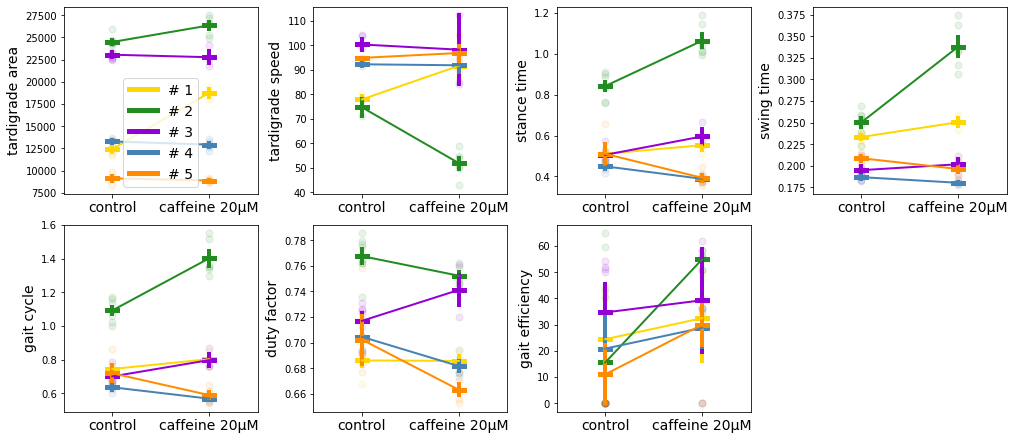

In [8]:
# compare step parameters for a group of legs

# which legs should we compare?
legs_to_comp = get_leg_combos()['legs_lateral'] # usually 'legs_lateral' or 'legs_4'
groups = [groupA, groupB]

# what type of comparison should we do?
if len(tardigrades_in_clip1) == 1 and len(tardigrades_in_clip2) == 1:
    # if 1 tardigrade in each group
    # do compare_step_parameters plot
    print('\nOne tardigrade in each group, doing compare_step_parameters plot\n')
    compare_step_parameters([groupA, groupB], [df1, df2], legs_to_comp)
else:
    # if > 1 tardigrades in each group, do paired comparison plots
    # make sure that same tardigrades are in each group
    if tardigrades_in_clip1 == tardigrades_in_clip2:
        print('Same tardigrades in each group, doing paired comparison plots')
        parameters = ['tardigrade_area', 'tardigrade_speed', 'stance_time', 
                      'swing_time', 'gait_cycle', 'duty_factor', 'gait_efficiency']
#         parameters = ['stance_time','swing_time', 'gait_cycle', 'duty_factor']
        tardigrade_data = get_paired_step_parameters(parameters, legs_to_comp, 
                                                     [groupA, groupB], [df1, df2], [size_speed_1, size_speed_2])
    else:
        print('Different tardigrades in these groups ... paired comparisons not appropriate')
        
# print(tardigrade_data)
paired_comparison_plot(parameters, tardigrade_data, groups)

In [9]:
# gait styles
# compare 1-3
#     charts like those above where we compare each tardigrade pre and post treatment
#     compare % time in (canonical?) tripod, in (canonical?) tetrapod, in pentapod, in stand
    
# compare 4
#     charts like those above where we compare tardigrade pre and post treatment
#     compare % time in stand, step, hop

In [10]:
# given a list of clip folders
#    make a list of dictionaries of leg_swing_combo counts
#    plot a bar graph for each dictionary!

clip_folders1 = sorted(list(set(df1['clip'].values)))
clip_folders2 = sorted(list(set(df2['clip'].values)))

movie_folders1 = [os.path.join(tardi_gait, exp_dir, groupA, x) for x in clip_folders1]
movie_folders2 = [os.path.join(tardi_gait, exp_dir, groupB, x) for x in clip_folders2]

leg_set = 'lateral'
leg_swing_combos1 = [get_leg_swing_combos(clip, leg_set) for clip in movie_folders1]
combined_leg_swing_combos1 = combineDictionariesWithCommonKeys(leg_swing_combos1)

leg_swing_combos2 = [get_leg_swing_combos(clip, leg_set) for clip in movie_folders2]
combined_leg_swing_combos2 = combineDictionariesWithCommonKeys(leg_swing_combos2)

f, ax = gait_style_plot([combined_leg_swing_combos1, combined_leg_swing_combos2], 
                        groups, 
                        leg_set)
plt.show()

IndexError: list index out of range

In [ ]:
leg_set = 'rear'
leg_swing_combos1 = [get_leg_swing_combos(clip, leg_set) for clip in movie_folders1]
combined_leg_swing_combos1 = combineDictionariesWithCommonKeys(leg_swing_combos1)

leg_swing_combos2 = [get_leg_swing_combos(clip, leg_set) for clip in movie_folders2]
combined_leg_swing_combos2 = combineDictionariesWithCommonKeys(leg_swing_combos2)

f, ax = gait_style_plot([combined_leg_swing_combos1, combined_leg_swing_combos2], 
                        groups, 
                        leg_set)
plt.show()

In [ ]:
# gait style: compare groups in paired plots
# for each tardigrade, show % of time in Tetrapod? Tripod? Pentapod? Stand?
